In [1]:
import pyaerocom as pya

Initating pyaerocom configuration
Checking server configuration ...
Checking access to: /lustre/storeA
Access to lustre database: True
Init data paths for lustre
Expired time: 0.019 s


In [2]:
MOD1 = 'MODIS6.aqua'
YEAR = 2010

In [3]:
r = pya.io.ReadGridded(MOD1)
print(r)


Pyaerocom ReadGridded
---------------------
Model ID: MODIS6.aqua
Data directory: /lustre/storeA/project/aerocom/aerocom-users-database/SATELLITE-DATA/MODIS6.aqua/renamed
Available variables: ['od550aer']
Available years: [2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]
Available time resolutions ['daily']


In [4]:
d = r.read_var('od550aer', start=2010)

/home/jonasg/anaconda3/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1932: UserWarning: Ignoring netCDF variable 'od550aer' invalid units 'none'
  warnings.warn(msg)


### Plot first day in different styles

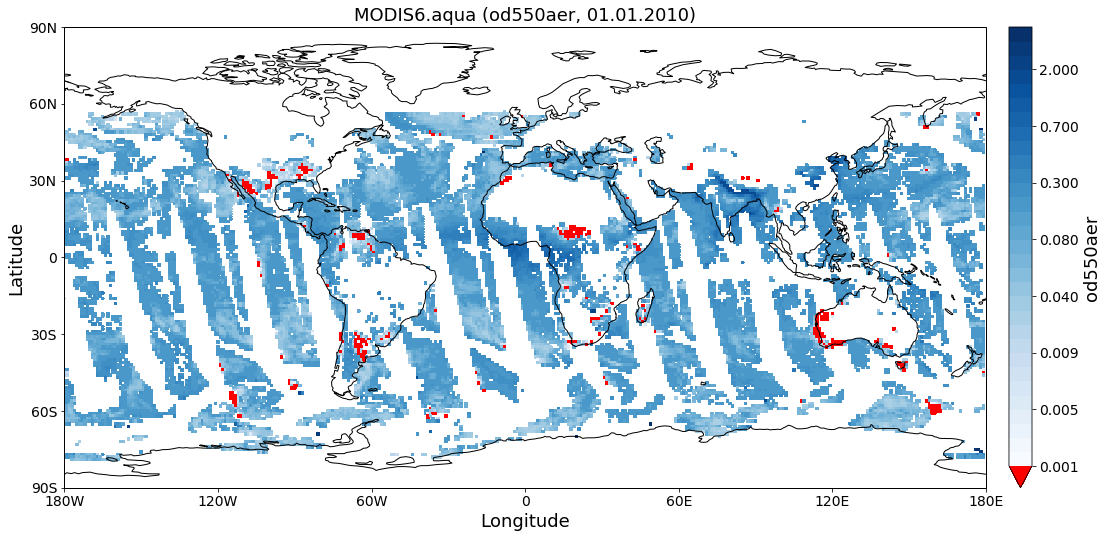

In [5]:
d.quickplot_map();

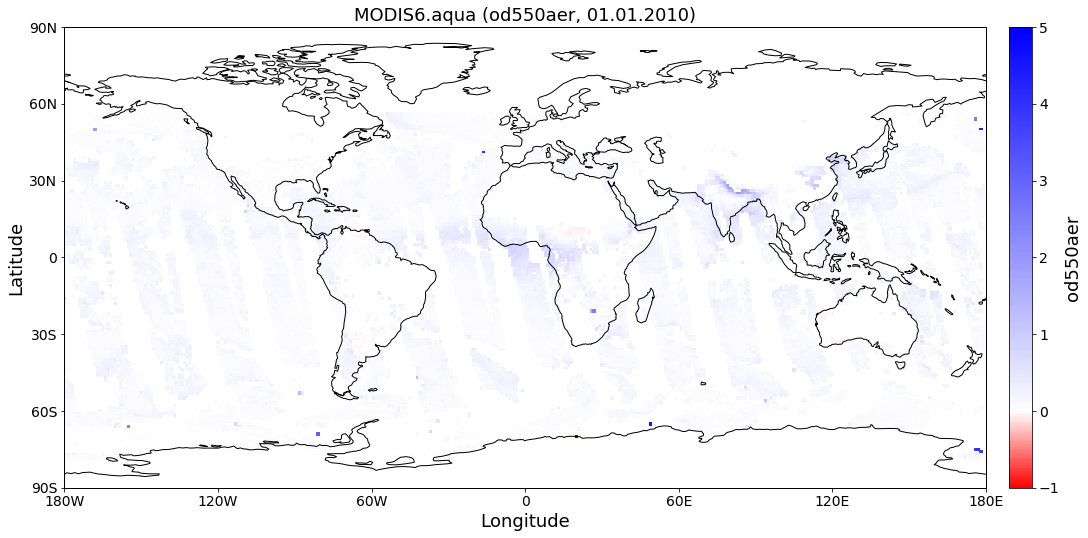

In [6]:
d.quickplot_map(vmin=-1, vmax=5, log_scale=False, discrete_norm=True);

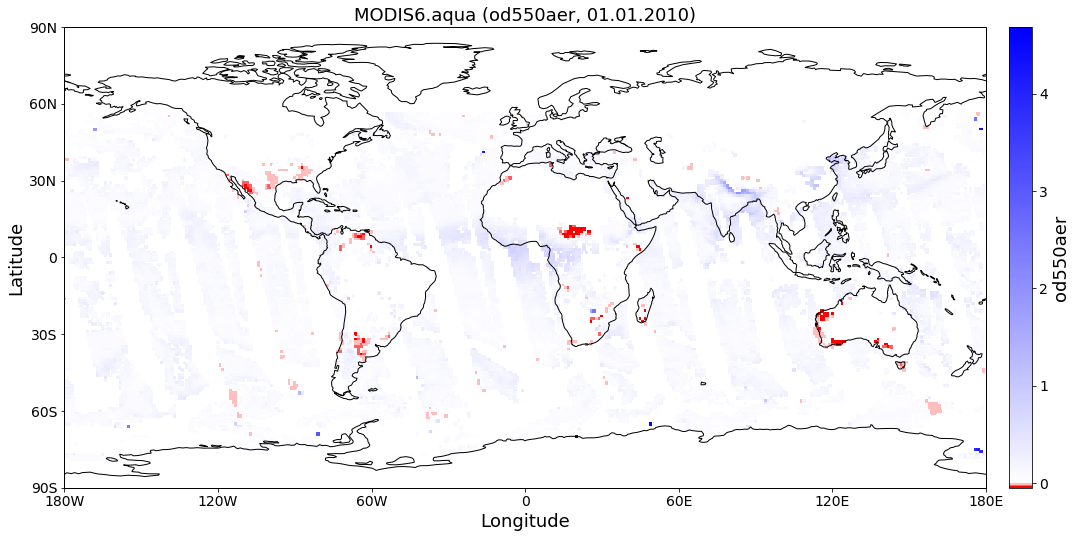

In [7]:
d.quickplot_map(log_scale=False);

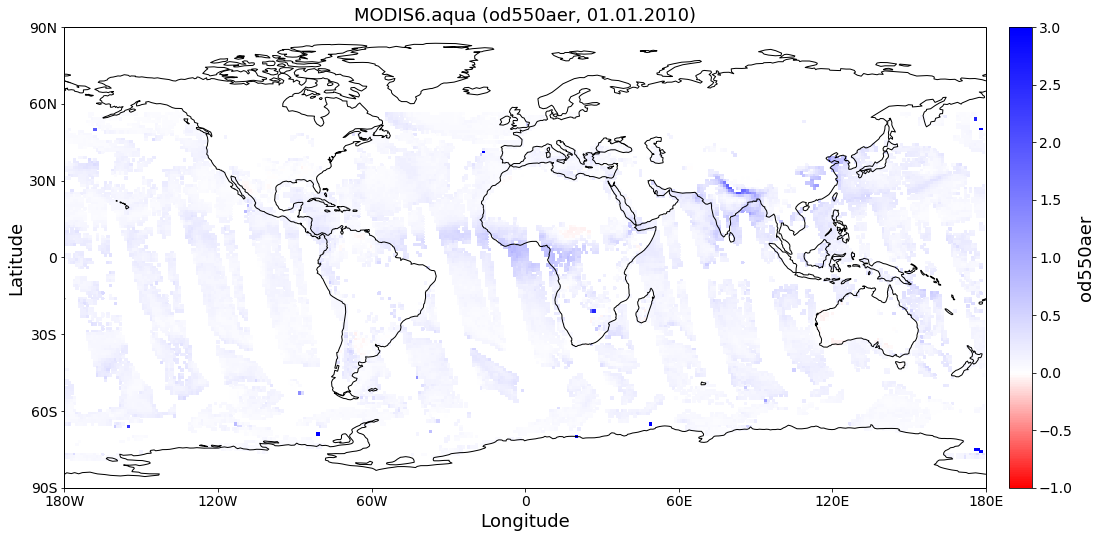

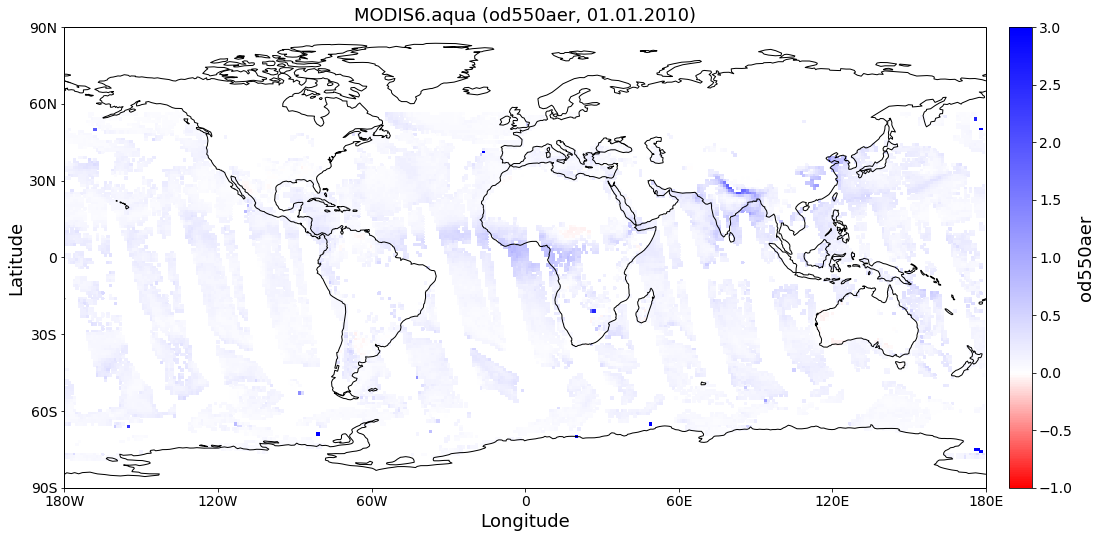

In [8]:
d.quickplot_map(vmin=-1, vmax=3)

In [9]:
d.data[d.data<-1]

masked_array(data=[--, --, --, ..., --, --, --],
             mask=[ True,  True,  True, ...,  True,  True,  True],
       fill_value=-9999.0,
            dtype=float64)

In [20]:
lons_new = np.arange(d.longitude.points.min(), d.longitude.points.max(), 5)
lats_new = np.arange(d.latitude.points.min(), d.latitude.points.max(), 5) 
lons_new

array([-179.5, -174.5, -169.5, -164.5, -159.5, -154.5, -149.5, -144.5,
       -139.5, -134.5, -129.5, -124.5, -119.5, -114.5, -109.5, -104.5,
        -99.5,  -94.5,  -89.5,  -84.5,  -79.5,  -74.5,  -69.5,  -64.5,
        -59.5,  -54.5,  -49.5,  -44.5,  -39.5,  -34.5,  -29.5,  -24.5,
        -19.5,  -14.5,   -9.5,   -4.5,    0.5,    5.5,   10.5,   15.5,
         20.5,   25.5,   30.5,   35.5,   40.5,   45.5,   50.5,   55.5,
         60.5,   65.5,   70.5,   75.5,   80.5,   85.5,   90.5,   95.5,
        100.5,  105.5,  110.5,  115.5,  120.5,  125.5,  130.5,  135.5,
        140.5,  145.5,  150.5,  155.5,  160.5,  165.5,  170.5,  175.5])

In [22]:
d.longitude.points.min(), d.longitude.points.max()

(-179.5, 179.5)

In [10]:
dc = d.interpolate(latitude=lats_new, longitude=lons_new)

Interpolating data of shape (365, 180, 360). This may take a while.
Successfully interpolated cube


In [11]:
d.min()

-0.050000002374872565

In [12]:
dc.min()

-0.050000002374872565

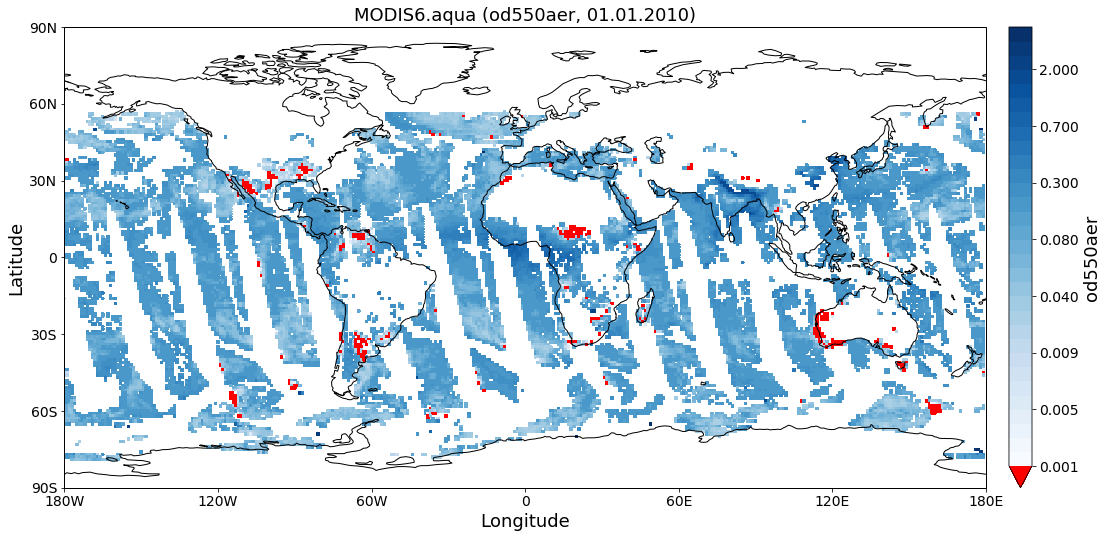

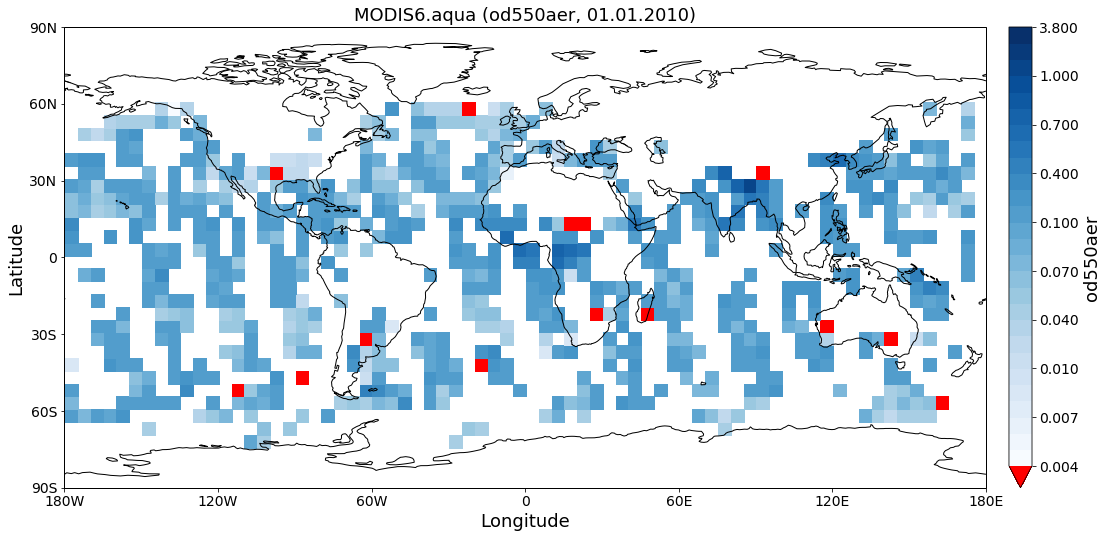

In [13]:
d.quickplot_map()
dc.quickplot_map();